In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = np.random.rand(50)
Y = 2*X+np.random.normal(0,0.1,50)

np.cov(X,Y)[0,1]

np.float64(0.17071894147729533)

In [4]:
X = np.random.rand(50)
Y = 2*X+4

print('Covarience of X and Y :\n'+str(np.cov(X,Y)))
print('Correlation of X and Y:\n' + str(np.corrcoef(X,Y)))

Covarience of X and Y :
[[0.09312212 0.18624424]
 [0.18624424 0.37248848]]
Correlation of X and Y:
[[1. 1.]
 [1. 1.]]


In [ ]:
cov_matrix = np.cov(X,Y)

error = cov_matrix[0,0] - X.var(ddof=1) # X의 분산 가져와서 실제 함수로 계산한거랑 비교

print('error: '+ str(error))

error: -1.3877787807814457e-17


Correlation: -0.011581816594678256
Built - in Correlation:-0.011350180262784693


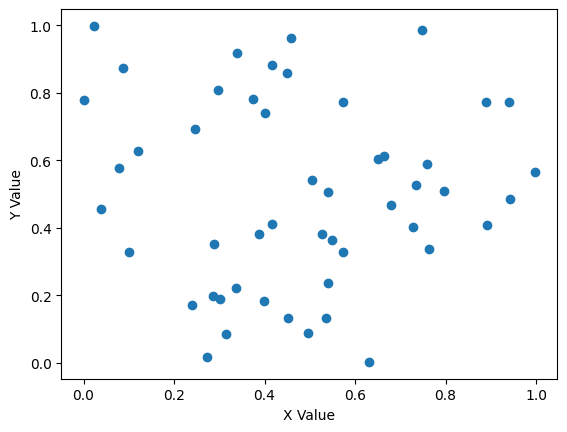

In [9]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: ' + str(np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y))))
print('Built - in Correlation:' + str(np.corrcoef(X,Y)[0,1]))


In [ ]:
X = np.random.rand(50)
Y = X + np.random.normal(0,0.1,50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: '+ str(np.corrcoef(X,Y)[0,1]))

array([ 1.09459815,  0.5747981 ,  0.63015801,  0.61031694,  0.93989429,
       -0.05997101,  1.05242313,  0.41602038,  0.30000444,  0.89969069,
        0.18916365,  0.97983381,  0.60849134,  0.93035223,  0.70982328,
        0.26349967,  0.38196977,  1.02944044,  0.58993455, -0.02814454,
        0.10313772,  0.10670421,  0.71452127,  0.52889238,  0.13672022,
        0.9159026 ,  0.33882566,  0.73041893,  0.59038965,  0.19760426,
        0.14638213,  0.88762502, -0.05965588,  0.14642204,  0.10960555,
        0.56220103,  1.0678731 ,  0.38280198,  1.0535511 ,  0.44232234,
        0.13632491,  0.78265164,  0.04098596,  0.84914652,  0.37867257,
        0.31905393,  0.97179025,  0.35651692,  0.19673852,  0.30235083])

Correlation: 0.8080921749826946


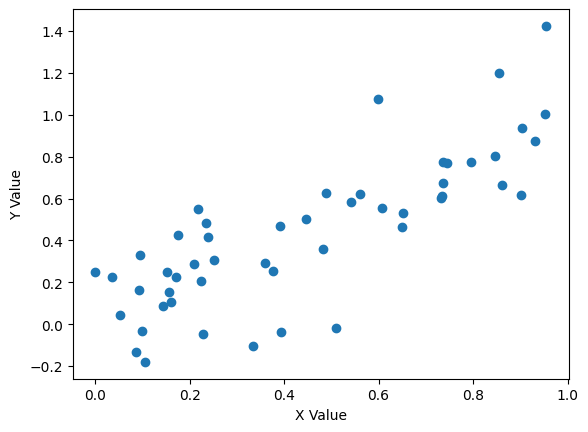

In [15]:
X = np.random.rand(50)
Y = X+np.random.normal(0,.2,50)
Y
plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: '  + str(np.corrcoef(X,Y)[0,1]))

Correlation: -0.9404891171202174


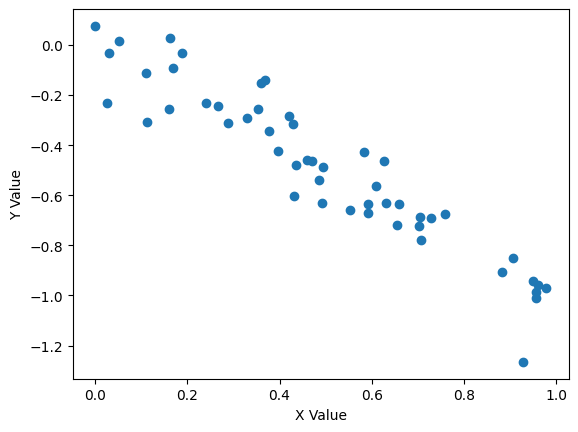

In [16]:
X = np.random.rand(50)
Y = -X + np.random.normal(0,.1,50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: '+ str(np.corrcoef(X,Y)[0,1]))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Correlation coefficients
LRCX and AAPL: 0.9595012145699885
LRCX and SPY: 0.9390677396003605
AAPL and SPY: 0.9078499245638981


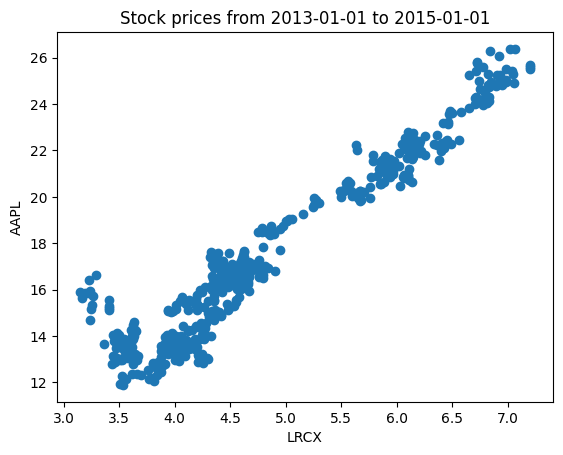

In [18]:
import yfinance as yf
start = '2013-01-01'
end = '2015-01-01'
data1 = yf.download('SPY',start=start,end=end,auto_adjust=True)
data2 = yf.download('LRCX',start=start,end=end,auto_adjust=True)
data3 = yf.download('AAPL',start=start,end=end,auto_adjust=True)

bench = data1['Close']['SPY']
a1 = data2['Close']['LRCX'] 
a2 = data3['Close']['AAPL'] 


plt.scatter(a1,a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to '+end)
print('Correlation coefficients')
print('LRCX and AAPL:', np.corrcoef(a1,a2)[0,1])
print('LRCX and SPY:', np.corrcoef(a1,bench)[0,1])
print('AAPL and SPY:', np.corrcoef(bench,a2)[0,1])

Text(0, 0.5, '60-day Rolling Correlation')

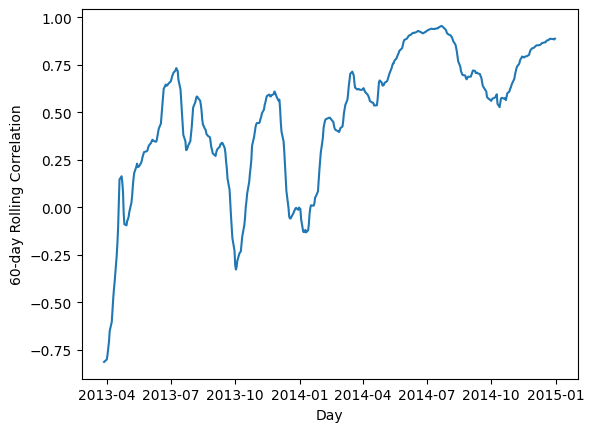

In [21]:
rolling_correlation = a1.rolling(window=60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')

np.float64(0.31127884124168315)

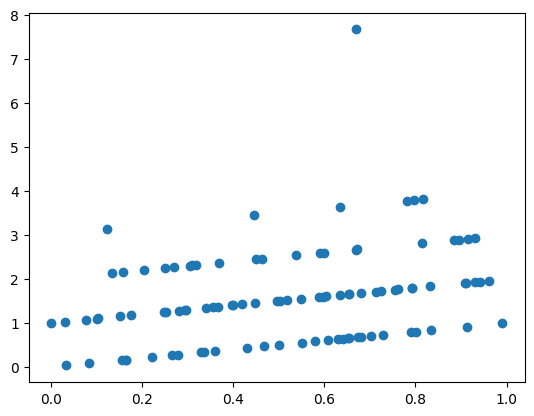

In [23]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X,Y)

np.corrcoef(X,Y)[0,1]

In [25]:
import scipy.stats as stats
import math

In [26]:
l = [10,9,5,7,5]
print('Raw data:',l)
print('Ranking: ', list(stats.rankdata(l,method="average")))

Raw data: [10, 9, 5, 7, 5]
Ranking:  [np.float64(5.0), np.float64(4.0), np.float64(1.5), np.float64(3.0), np.float64(1.5)]


In [27]:
n = 100

def compare_correlation_and_spearman_rank(n):
    X = np.random.poisson(size=n)
    Y = np.exp(X) + np.random.poisson(size=n)

    Xrank = stats.rankdata(X,method='average')
    Yrank = stats.rankdata(Y,method='average')

    diffs = Xrank - Yrank
    r_s= 1 - 6*sum(diffs*diffs)/(n*(n**2-1))
    c_c=np.corrcoef(X,Y)[0,1]

    return r_s,c_c

experiments = 1000
spearman_dist = np.ndarray(experiments)
correlation_dist = np.ndarray(experiments)
for i in range(experiments):
    r_s,c_c = compare_correlation_and_spearman_rank(n)
    spearman_dist[i] = r_s
    correlation_dist[i] = c_c

print('Spearman Rank Coefficient: ' + str(np.mean(spearman_dist)))
print('Correlation coefficient: ' + str(np.mean(correlation_dist)))

Spearman Rank Coefficient: 0.8728800480048006
Correlation coefficient: 0.7724147986031616


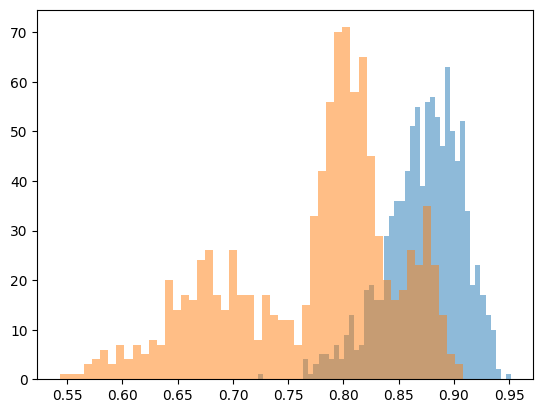

In [30]:
plt.hist(spearman_dist,bins=50,alpha = 0.5)
plt.hist(correlation_dist,bins=50,alpha = 0.5)
print("")

# 상관관계 분석이 실패하는 또 다른 경우: 시차(Lag) 문제

Text(0, 0.5, 'Value')

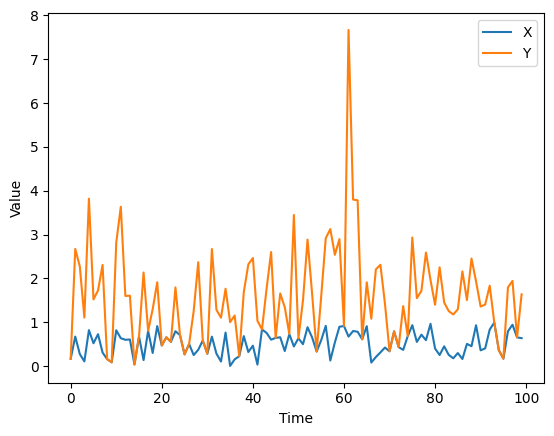

In [32]:
plt.plot(X)
plt.plot(Y)
plt.legend(['X','Y'])
plt.xlabel('Time')
plt.ylabel('Value')

In [35]:
n = 100

X = np.random.rand(n)
Xrank = stats.rankdata(X,method = 'average')

Yrank = stats.rankdata([1,1] + list(X[:(n-2)]),method='average')

diffs = Xrank - Yrank
r_s = 1 - 6*sum(diffs*diffs)/(n*(n**2-1))
print(r_s)

0.1013111311131113


In [36]:
np.random.seed(161)
X=np.random.rand(10)
Y = np.random.rand(10)

r_s = stats.spearmanr(X,Y)
print('Spearman Rank cofficient: ', r_s[0])
print('p-value: ', r_s[1])

Spearman Rank cofficient:  0.23636363636363633
p-value:  0.5108853175152002


## 뮤추얼 펀드의 운용보수(Expense Ratio) 대 샤프 비율(Sharpe Ratio)에 대한 스피어만 랭크 상관관계를 테스트

Spearman Rank coefficient:  -0.3696969696969697
p-value:  0.2930500752928223


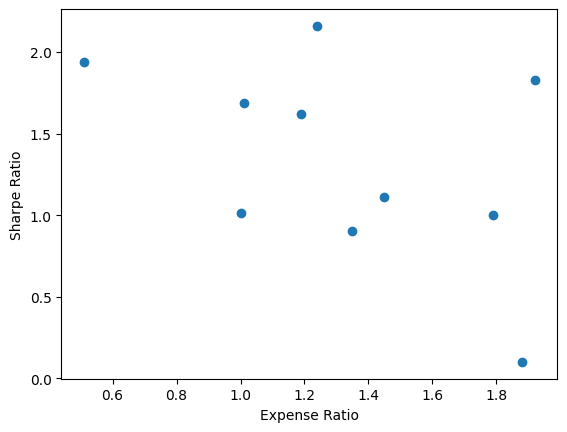

In [38]:
expense = [1.35,1.79,1.45,1.88,1.,1.01,1.19,1.92,0.51,1.24]
sharpe = [0.9,1.,1.11,0.1,1.01,1.69,1.62,1.83,1.94,2.16]

plt.scatter(expense,sharpe)
plt.xlabel('Expense Ratio')
plt.ylabel('Sharpe Ratio')

r_S = stats.spearmanr(expense,sharpe)
print('Spearman Rank coefficient: ',r_S[0])
print('p-value: ',r_S[1])

## 롱숏 주식 전략과 모멘텀 검증

In [ ]:
symbol_list = [
    'AAPL', 'MSFT', 'NVDA', 'TSLA', 'GOOGL',  # 빅테크 (M7)
    'AMZN', 'META', 'AMD', 'AVGO', 'INTC',    # 반도체 및 커머스
    'SPY', 'QQQ', 'SOXX'                      # 시장 지수 및 섹터 ETF (비교용)
]
start = '2014-12-01'
end = '2015-01-01'
data = yf.download(symbol_list,start=start,end=end,auto_adjust=True)['Close']
first = data[symbol_list[0]]
for j in range(1,len(symbol_list)):
    historical_returns = pd.concat([first,historical_returns],axis=1)
# historical_returns = historical_returns.pct_change()[1:]
historical_returns
scores = np.mean(historical_returns)
print('Our Scores\n')
print(scores)
print('\n')

start= '2015-01-01'
end =  '2015-02-01'
data2 = yf.download(symbol_list,start=start,end=end,auto_adjust=True)['Close'][symbol_list]
walk_forward_returns = data2.pct_change()[1:]
walk_forward_returns = np.mean(walk_forward_returns)
print('The Walk Forward Returns\n')
print(walk_forward_returns)
print('\n')


plt.scatter(scores,walk_forward_returns)
print('Correlation Coefficients: ',str(r_s[0]))
print('p-value: '+ str(r_s[1]))


[*********************100%***********************]  13 of 13 completed


,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,...,TSLA,GOOGL,AMZN,META,AMD,AVGO,INTC,SPY,QQQ,SOXX
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-01,25.510059,25.510059,25.510059,25.510059,25.510059,25.510059,25.510059,25.510059,25.510059,25.510059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-02,25.412516,25.412516,25.412516,25.412516,25.412516,25.412516,25.412516,25.412516,25.412516,25.412516,...,-0.000907,-0.001964,0.000951,0.004794,0.003745,0.013744,0.011568,0.006464,0.004007,0.006286
2014-12-03,25.700712,25.700712,25.700712,25.700712,25.700712,25.700712,25.700712,25.700712,25.700712,25.700712,...,-0.009204,-0.003008,-0.030063,-0.007686,0.022388,0.031779,-0.004521,0.003863,0.001806,0.021004
2014-12-04,25.603170,25.603170,25.603170,25.603170,25.603170,25.603170,25.603170,25.603170,25.603170,25.603170,...,-0.004448,0.010448,0.001359,0.004808,-0.018248,0.083465,0.000801,-0.001106,-0.000474,0.000844
2014-12-05,25.494545,25.494545,25.494545,25.494545,25.494545,25.494545,25.494545,25.494545,25.494545,25.494545,...,-0.020019,-0.026724,-0.013568,0.014886,-0.011152,0.008926,0.005606,0.001637,0.000095,0.010014
2014-12-08,24.918146,24.918146,24.918146,24.918146,24.918146,24.918146,24.918146,24.918146,24.918146,24.918146,...,-0.041795,0.005018,-0.019160,0.002095,-0.030075,-0.031542,-0.012477,-0.006682,-0.007117,-0.014089
2014-12-09,25.299456,25.299456,25.299456,25.299456,25.299456,25.299456,25.299456,25.299456,25.299456,25.299456,...,0.011803,0.010137,0.019110,0.004182,0.003876,0.019164,-0.008333,-0.000678,0.003154,-0.000106
2014-12-10,24.818384,24.818384,24.818384,24.818384,24.818384,24.818384,24.818384,24.818384,24.818384,24.818384,...,-0.032505,-0.015053,-0.021312,-0.008589,-0.042471,-0.033028,-0.012741,-0.016032,-0.015720,-0.019056
2014-12-11,24.745226,24.745226,24.745226,24.745226,24.745226,24.745226,24.745226,24.745226,24.745226,24.745226,...,-0.004575,0.007708,0.004970,0.020347,0.004032,0.013098,0.007688,0.005070,0.004743,0.004749
